# HR Turn Over Analytics

## Data Diri
Nama Lengkap: Kresna Devara

## Import Library

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Data

In [88]:
df = pd.read_csv('HR_Analytics.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Exploratory Data Analysis

### Deskripsi dan Check Data

**Penjelasan Data**
***
- satisfaction_level: Angka kepuasan yang dibeirkan karyawan (0-1)
- last_evaluation: Angka penilaian dari manager (0-1)
- number_project: Jumlah projek yang pernah dikerjakan karyawan
- average_monthly_hours: Total jam kerja per bulan
- time_spend_company: Total masa kerja dalam tahun
- Work_accident: Dummy variable terjadinya kecelakaan: Ya (1), Tidak (0)
- left: Dummy variable: Keluar (1), Tetap (0)
- promoted_last_5years: Dummy variable, Dipromosikan (1), Tidak dipromosikan(0)
- sales: Nama department (sales,technical,support,IT, product,marketing, other)
- salary: 3-level kategori sallary (low, medium, high)

**Data Check**
***

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [108]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [4]:
print("Total Null data: " + str(df.isnull().sum().sum()))
print("Total NA data: " + str(df.isna().sum().sum()))

Total Null data: 0
Total NA data: 0


Tidak ada data yang kosong

In [109]:
df.describe().to_markdown()

'|       |   satisfaction_level |   last_evaluation |   number_project |   average_montly_hours |   time_spend_company |   Work_accident |         left |   promotion_last_5years |\n|:------|---------------------:|------------------:|-----------------:|-----------------------:|---------------------:|----------------:|-------------:|------------------------:|\n| count |         14999        |      14999        |      14999       |             14999      |          14999       |    14999        | 14999        |           14999         |\n| mean  |             0.612834 |          0.716102 |          3.80305 |               201.05   |              3.49823 |        0.14461  |     0.238083 |               0.0212681 |\n| std   |             0.248631 |          0.171169 |          1.23259 |                49.9431 |              1.46014 |        0.351719 |     0.425924 |               0.144281  |\n| min   |             0.09     |          0.36     |          2       |                96      |   

### Check Outlier

Data numerik pada dataset hanyalah: 
- satisfaction_level
- last_evaluation
- number_project
- average_montly_hours
- time_spend_company 

Sehingga hanya data tersebut saja yang akan dilakukan pengecekan


In [6]:
numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 
                   'average_montly_hours', 'time_spend_company']

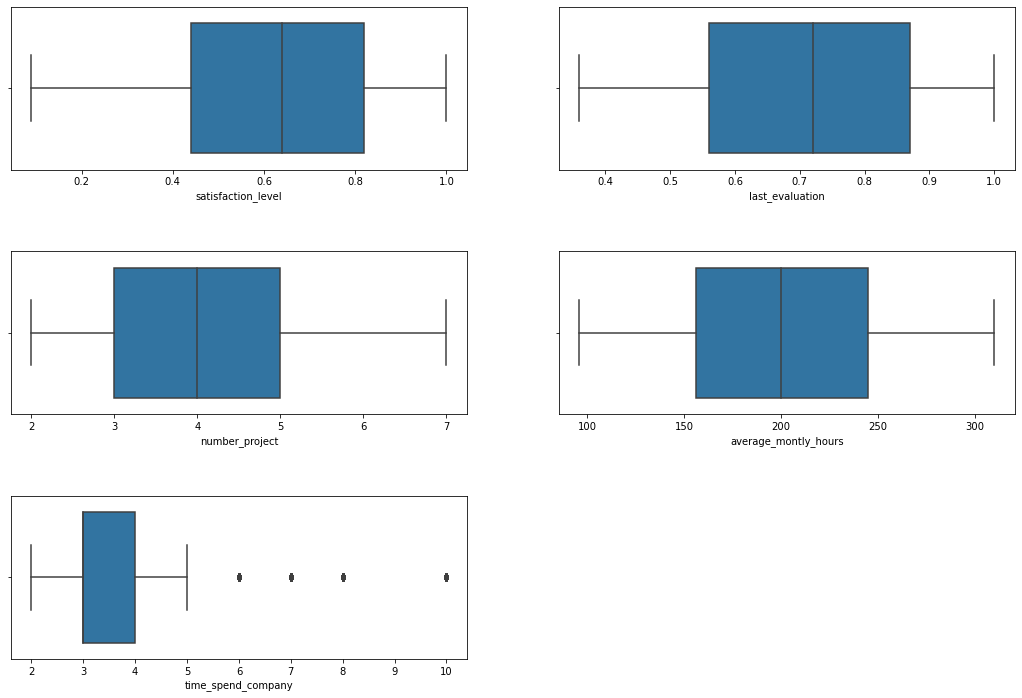

In [7]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x=df[column])

Dari data di atas hanya `time_spend_company` saja yang memiliki __outliers__ walaupun datanya sedikit, namun data lamanya tahun pada perusahaan sangatlah berpengaruh terhadap keputusan pergi atau tidaknya karyawan dari suatu perusahaan, sehingga data `time_spend_company` ___tidak dibuang___

### Univariate Analysis

Sebelumnya telah diketahui column yang beriskan data numerik, sehingga sisanya adalah data kategori:
- Work_accident
- promoted_last_5_years
- sales
- salary

Pada bagian ini kita akan melihat analisa setiap kolomnya baik itu kategori ataupun numerik

In [8]:
category_columns = [p for p in df.columns if p not in numeric_columns]

#### Analisa Kolom Kategori

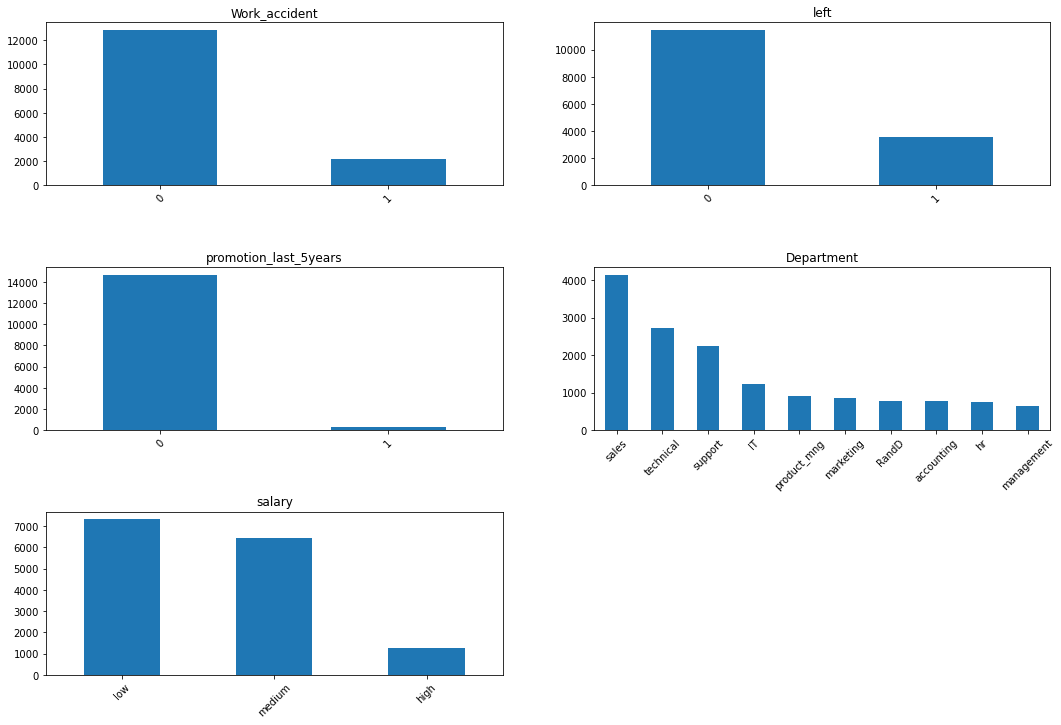

In [9]:
# fitur cut
plt.figure(figsize=(18, 12))
for i, col in enumerate(category_columns):
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(hspace=0.5)
    count = df[col].value_counts()
    percent = 100*df[col].value_counts(normalize=True)
    df_plt = pd.DataFrame({'Jumlah Sample':count, 'Persentase':percent.round(1)})
    count.plot(rot=45, kind='bar', title=col)    

__Analisa Univariate analyis kolom kategori__
***
1. Jumlah data karywan yang tidak mengalami work accident lebih banyak dan tidak seimbang (imbalance)
2. Karyawan yang meninggalkan perusahaan lebih sediki dibanding yang tetap tinggal (imbalance)
3. Jumlah karyawan yang belum dipromosikan leibh banyak dan tidak seimbang
4. Departemen **sales** memiliki karyawan yang paling banyak
5. Karyawan dengan kategori tinggi memiliki jumlah paling rendah

#### Analisa Kolom Numerik

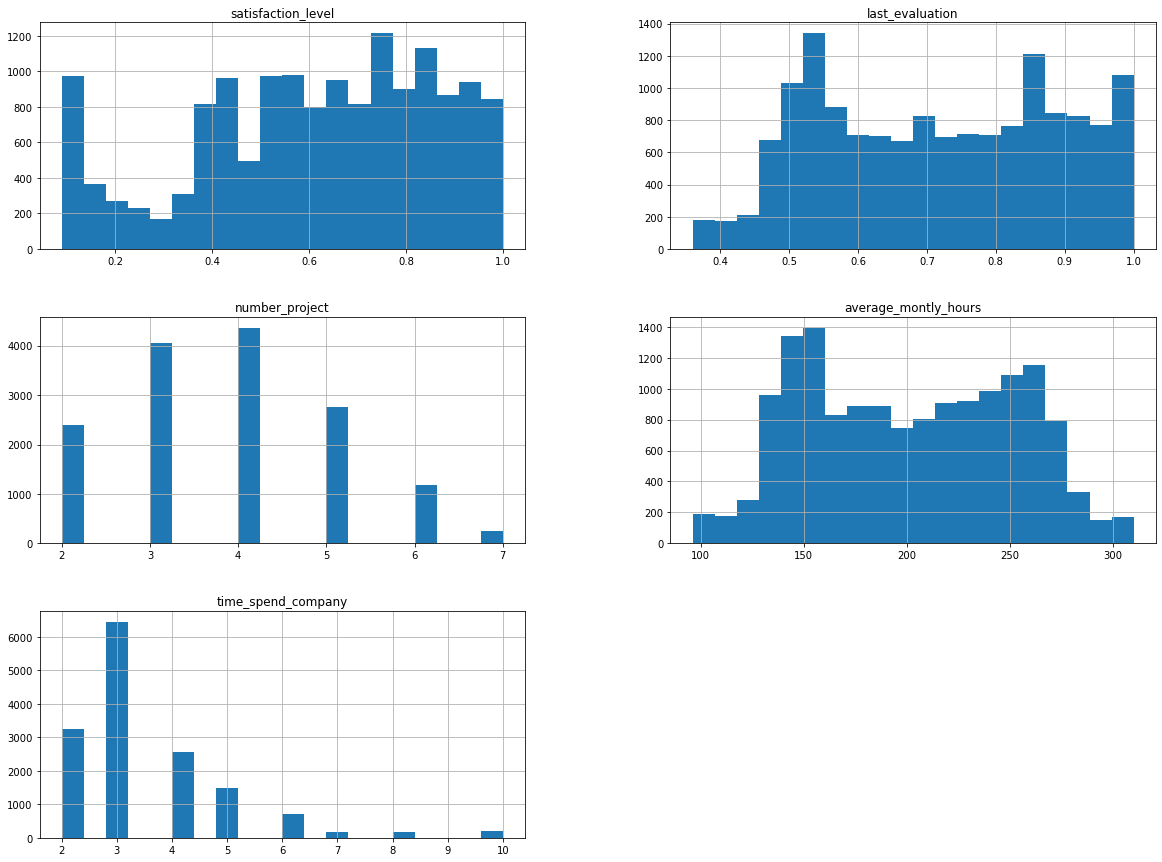

In [10]:
df[numeric_columns].hist(bins=20, figsize=(20,15))
plt.show()

__Analisa Univariate analyis kolom Numerik (Hanya yang Meninggalkan Perusahaan)__
***
1. Satisfication level, Last Evaluation, Number Project, danAvarage Montly hours karyawan beragam
2. Jumlah karyawan dengan jumlah tahun kerja 3 tahun paling dominan

### Multivariate Analysis

Pada analisa ini variable `left` akan ikut disertakan sebagai variable kedua

In [11]:
category_columns.remove('left')

#### Analisa Kolom Kategori 

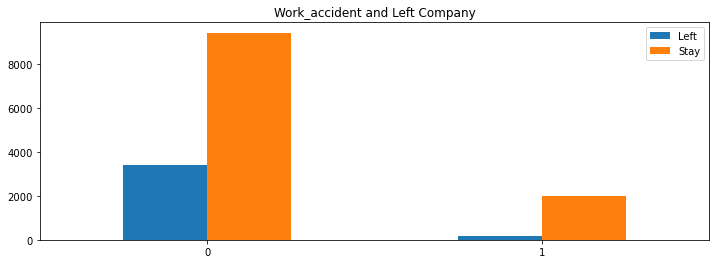

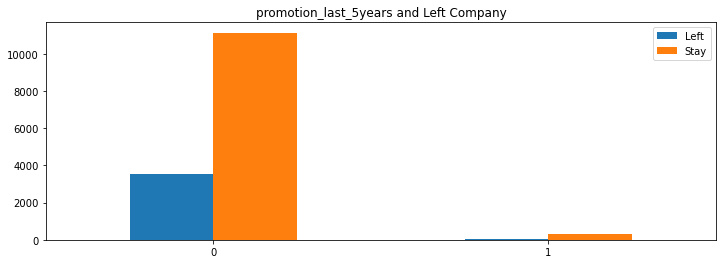

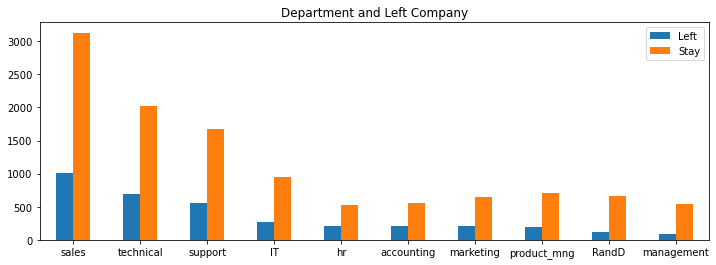

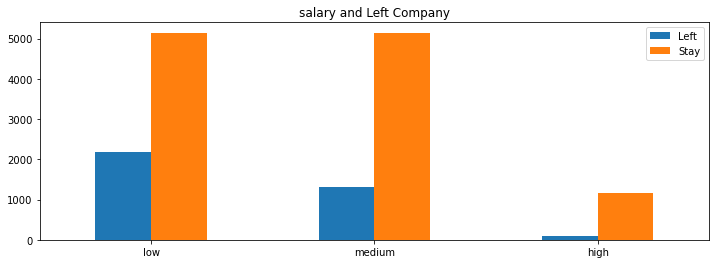

In [118]:
for i, column in enumerate(category_columns):
    df_plt = pd.DataFrame()

    df_plt['Left'] = df[df['left'] == 1][column].value_counts()
    df_plt['Stay'] = df[df['left'] == 0][column].value_counts()
    
    df_plt.plot.bar(rot=0, title = '{} and Left Company'.format(column), figsize=(12, 4))

__Analisa Multivariate analyis kolom kategori__
***
1. Jumlah data karywan yang pergi dan stay di perusahaan tidak seimbang (imbalance dataset)
2. Karyawan yang **belum** pernah mengalami work accident lebih banyak meninggalkan perusahaan
3. Karyawan yang **belum** dipromosikan dalam 5 tahun terakhir lebih banyak meninggalkan perusahaan
4. Departemen **sales** memiliki karyawan yang paling banyak meninggalkan perusahaan
5. Karyawan dengan gaji kategori **rendah** paling banyak meninggalkan karyawan

#### Analisa Kolom Numerik (Hanya yang Meninggalkan Perusahaan)

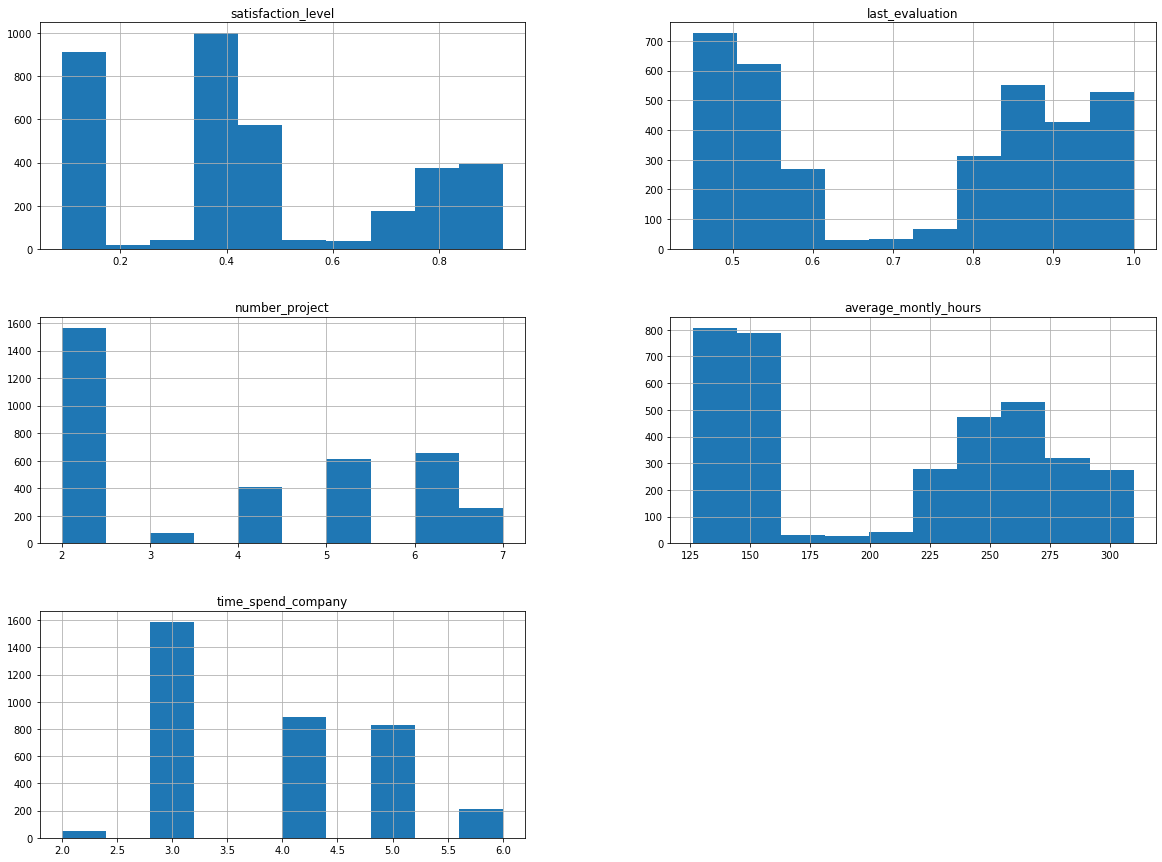

In [13]:
df[df['left'] == 1][numeric_columns].hist(figsize=(20,15))
plt.show()

__Analisa Multivariate analyis kolom Numerik (Hanya yang Meninggalkan Perusahaan)__
***
1. Karyawan yang pergi meninggalkan perusahaan adalah karyawan dengan satisfication level rendah (0.1) dan menengah  (0.4)
2. Karyawan dengan penilain buruk (<0.5) dan penilaian baik (>0.8) sama-sama pergi dari perusahaan
3. Karyawan dengan jumlah projek **terendah (2)** pergi meninggalkan perusahaan
4. Karyawan dengan jumlah jam paling sedikit setiap bulannya (<160 jam) paling banyak pergi meninggalkan perusahaan
5. Karyawan dengan waktu bersama perusahaan **3 tahun** paling banyak meninggalkan perusahaan

#### Korelasi Matrix Untuk Fitur

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur')

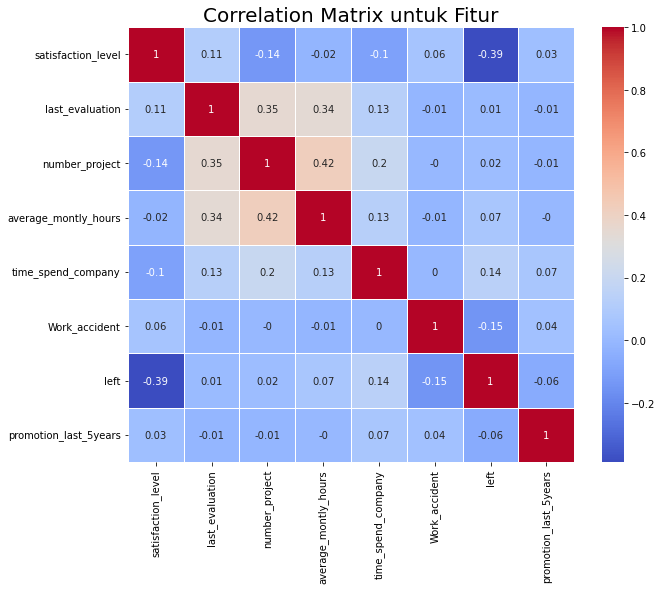

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur", size=20)

Terlihat dari correlation matrix, bahwa **satisfication level** merupakan fitur yang paling memiliki korelasi dengan perginya karyawan dari perusahaan

## Data Preparation

Dari semua fitur, column yang memiliki kategori beragam hanya:
- Department
- Salary

Sehingga hanya 2 fitur tersebut yang akan dilakukan encoding dengan menggunkaan OneHot Encoding

In [15]:
df = pd.concat([df, pd.get_dummies(df['Department'], prefix='job')], axis=1)
df = pd.concat([df, pd.get_dummies(df['salary'], prefix='salary')], axis=1)

df.drop(['Department', 'salary'], axis=1, inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,job_IT,job_RandD,...,job_hr,job_management,job_marketing,job_product_mng,job_sales,job_support,job_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [119]:
df.head().to_markdown()

'|    |   satisfaction_level |   last_evaluation |   number_project |   average_montly_hours |   time_spend_company |   Work_accident |   left |   promotion_last_5years | Department   | salary   |\n|---:|---------------------:|------------------:|-----------------:|-----------------------:|---------------------:|----------------:|-------:|------------------------:|:-------------|:---------|\n|  0 |                 0.38 |              0.53 |                2 |                    157 |                    3 |               0 |      1 |                       0 | sales        | low      |\n|  1 |                 0.8  |              0.86 |                5 |                    262 |                    6 |               0 |      1 |                       0 | sales        | medium   |\n|  2 |                 0.11 |              0.88 |                7 |                    272 |                    4 |               0 |      1 |                       0 | sales        | medium   |\n|  3 |        

PCA tidak dilakukan dikarenakan tidak ada fitur yang saling bersinggungan secara signifikan

### Train Test Split

Karena data memiliki jumlah yang sangat banyak (14999) splitting akan dilakukan dengan perbanding 80:20 (train:test)

In [16]:
X = df.drop(['left'], axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
print("Jumlah data train: " +  str(len(X_train)))
print("Jumlah data test: " +  str(len(X_test)))

Jumlah data train: 11999
Jumlah data test: 3000


### Scaling

Terdapat beberapa fitur numerik yang memiliki nilai beragam, sehingga perlu dilakukan scaling. Scaler yang dilakukan dengan menggunakan StandardScaler

#### Scale Train Data

In [120]:
scaler = StandardScaler()
scaler.fit(X_train[numeric_columns])
X_train[numeric_columns] = scaler.transform(X_train.loc[:, numeric_columns])
X_train[numeric_columns].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
12896,0.474481,-0.562644,0.162568,0.921578,0.342509
12545,0.675614,1.657633,0.973990,0.701313,1.028612
14833,-2.059790,-0.971642,-1.460274,0.921578,0.342509
8335,-0.088690,-1.205355,-1.460274,-1.501335,-0.343595
2724,0.273349,-1.380640,0.162568,1.001674,0.342509


In [121]:
X_train[numeric_columns].head().to_markdown()

'|       |   satisfaction_level |   last_evaluation |   number_project |   average_montly_hours |   time_spend_company |\n|------:|---------------------:|------------------:|-----------------:|-----------------------:|---------------------:|\n| 12896 |            0.474481  |         -0.562644 |         0.162568 |               0.921578 |             0.342509 |\n| 12545 |            0.675614  |          1.65763  |         0.97399  |               0.701313 |             1.02861  |\n| 14833 |           -2.05979   |         -0.971642 |        -1.46027  |               0.921578 |             0.342509 |\n|  8335 |           -0.0886901 |         -1.20536  |        -1.46027  |              -1.50134  |            -0.343595 |\n|  2724 |            0.273349  |         -1.38064  |         0.162568 |               1.00167  |             0.342509 |'

#### Scaling Test Data

In [19]:
X_test[numeric_columns] = scaler.transform(X_test.loc[:, numeric_columns])
X_test[numeric_columns].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
6910,1.077879,1.657633,-0.648853,-1.521359,-0.343595
2860,1.520371,-0.212074,0.162568,-0.219794,-0.343595
6286,-0.852994,-0.270502,-0.648853,-1.721600,-0.343595
12838,1.480145,0.313781,-0.648853,-0.199770,-1.029699
13692,0.876747,0.080068,0.162568,-0.880589,-1.029699


## Modeling

Dikarenakan data klasifikasi cukup imbalance, scoring yang digunakan adalah **`f1 score`**

### K Nearest Neighbor (KNN)

In [62]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [63]:
knn_f1 = f1_score(y_test, knn.predict(X_test))
print('f1 score: ' + str(knn_f1))

f1 score: 0.8961748633879781


In [64]:
n_neighbors = range(1, 20, 2)
train_score = []
test_score = []

for n in tqdm(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    trains = f1_score(y_train, knn.predict(X_train))
    tests = f1_score(y_test, knn.predict(X_test))
    
    train_score.append(trains)
    test_score.append(tests)

  0%|          | 0/10 [00:00<?, ?it/s]

Max test score: 0.9393319700068167
n_neighbor terbaik: 1


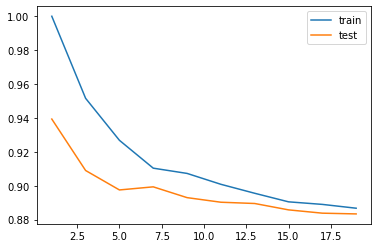

In [65]:
plt.plot(n_neighbors, train_score, label='train')
plt.plot(n_neighbors, test_score, label='test')
plt.legend()

print("Max test score: " + str(np.max(test_score)))
print("n_neighbor terbaik: " + str(n_neighbors[np.argmax(test_score)]))

n dengan nilai terbaik adalah 1

In [66]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [67]:
knn_f1 = f1_score(y_test, knn.predict(X_test))
print('f1 score: ' + str(knn_f1))

f1 score: 0.9393319700068167


###  Support Vector Machine (SVM)

In [68]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [69]:
svc_f1 = f1_score(y_test, svc.predict(X_test))
print('f1 score:: ' + str(svc_f1))

f1 score:: 0.9301994301994302


In [70]:
C_values = np.logspace(0, 3, 4, dtype=int)
train_score = []
test_score = []

for n in tqdm(C_values):
    svc = SVC(C=n)
    svc.fit(X_train, y_train)
    trains = f1_score(y_train, svc.predict(X_train))
    tests = f1_score(y_test, svc.predict(X_test))
    
    train_score.append(trains)
    test_score.append(tests)

  0%|          | 0/4 [00:00<?, ?it/s]

Max test score: 0.9490579204466155
C_value terbaik: 100


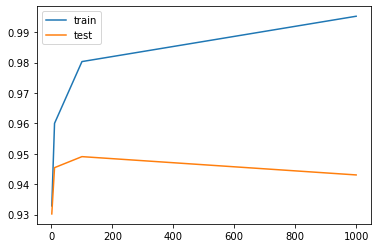

In [61]:
plt.plot(C_values, train_score, label='train')
plt.plot(C_values, test_score, label='test')
plt.legend()

print("Max test score: " + str(np.max(test_score)))
print("C_value terbaik: " + str(C_values[np.argmax(test_score)]))

C value dengan nilai terbaik adalah `100`

In [71]:
svc = SVC(C=100)
svc.fit(X_train, y_train)

SVC(C=100)

In [72]:
svc_f1 = f1_score(y_test, svc.predict(X_test))
print('f1 score:: ' + str(svc_f1))

f1 score:: 0.9490579204466155


### Random Forest

In [73]:
RF = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, n_jobs=-1, random_state=42)

In [74]:
rf_f1 = f1_score(y_test, RF.predict(X_test))
print('f1 score: ' + str(rf_f1))

f1 score: 0.8074735987002437


Hasil randomForest dengan parameter yang ditentukan masih kurang baik, sehingga tunning Hyperparameter dengan GridSearchCV dilakukan

##### Tunning dengan GridSearchCV

In [76]:
# mengetahui RandomForest Parameters
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [77]:
parameter = {
    "n_estimators": [25, 50, 100],
    "max_depth": [10, 20, 30],
    "min_samples_leaf": [1, 5, 10]
}
GSV = GridSearchCV(RF, parameter, cv=3, scoring='f1', n_jobs=-1, verbose=1)

In [78]:
GSV.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=5,
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [25, 50, 100]},
             scoring='f1', verbose=1)

In [79]:
print("Train Score best model: " + str(GSV.score(X_train, y_train)))
print("Test Score best model: " + str(GSV.score(X_test, y_test)))

Train Score best model: 0.9994750656167979
Test Score best model: 0.9779359430604982


In [80]:
GSV.best_params_

{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}

Parameter terbaik yaitu:
- max_depth: 30
- min_samples_leaf: 1
- n_estimators: 100

## Metrik Evaluasi

### KNN

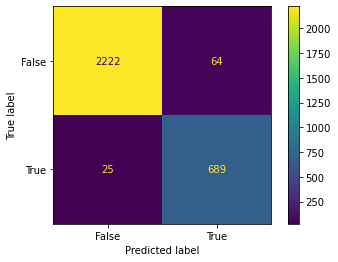

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2286
           1       0.92      0.96      0.94       714

    accuracy                           0.97      3000
   macro avg       0.95      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [34]:
knn_pred = knn.predict(X_test)
knn_confusion_matrix = metrics.confusion_matrix(y_test, knn_pred)
knn_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

knn_cm_display.plot()
plt.show()
print(metrics.classification_report(y_test, knn_pred))

### SVM

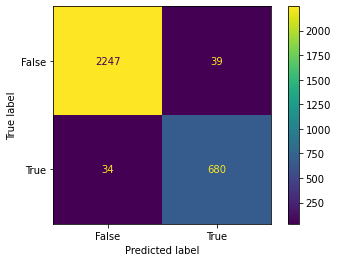

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2286
           1       0.95      0.95      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [82]:
svm_pred = svc.predict(X_test)
svm_confusion_matrix = metrics.confusion_matrix(y_test, svm_pred)
svm_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

svm_cm_display.plot()
plt.show()
print(metrics.classification_report(y_test, svm_pred))

### Random Forest

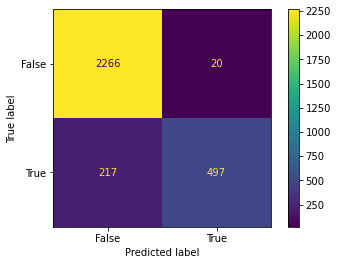

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2286
           1       0.96      0.70      0.81       714

    accuracy                           0.92      3000
   macro avg       0.94      0.84      0.88      3000
weighted avg       0.92      0.92      0.92      3000



In [83]:
RF_pred = RF.predict(X_test)
RF_confusion_matrix = metrics.confusion_matrix(y_test, RF_pred)
RF_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = RF_confusion_matrix, display_labels = [False, True])

RF_cm_display.plot()
plt.show()
print(metrics.classification_report(y_test, RF_pred))

`Random Forest sering gagal dalam memprediksi nilai True`

### Random Forest with GridSearchCV

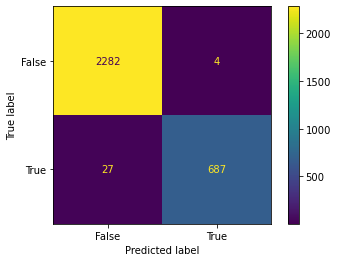

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [84]:
GSV_pred = GSV.predict(X_test)
GSV_confusion_matrix = metrics.confusion_matrix(y_test, GSV_pred)
GSV_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = GSV_confusion_matrix, display_labels = [False, True])

GSV_cm_display.plot()
plt.show()
print(metrics.classification_report(y_test, GSV_pred))

Random Forest dengan GridSearch Memiliki nilai f1 score tertingi yaitu **98%**

### Prediksi Real Data

In [85]:
prediksi = X_test.iloc[1000:1010].copy()
pred_dict = {'y_true':y_test[1000:1010]}

pred_dict['KNN'] = knn.predict(prediksi)
pred_dict['SVM'] = svc.predict(prediksi)
pred_dict['RandomForest'] = RF.predict(prediksi)
pred_dict['GridSearch'] = GSV.predict(prediksi)
 
pd.DataFrame(pred_dict)

,y_true,KNN,SVM,RandomForest,GridSearch
4278,0,0,0,0,0
244,1,1,1,0,1
10646,0,0,0,0,0
1818,1,1,1,0,1
2950,0,0,0,0,0
9241,0,0,0,0,0
1153,1,1,1,1,1
7535,0,0,0,0,0
13541,0,0,0,0,0
11167,0,0,0,0,0


Prediksi Real data menunjukan KNN, SVM, dan GridSearch memiliki prediksi yang bagus, sedangkan RandomForest dasar memiliki kekeliruan ketika memprediksi nilai True

## Feature Importance dengan Random Forest

Setelah mendapatkan model terbaik, kita perlu mengetahui fitur apa yang sangat penting berpengaruh pada hasil, sekaligus untuk memberitahu bagian HR untuk menjaga nilai tersebut sehinga karyawan tidak pergi.

Kembali dibuat randomforset dengan parameter terbaik pada GridSearch

In [38]:
RF_im = RandomForestClassifier(max_depth=30, min_samples_leaf=1, n_estimators=100, random_state=42, n_jobs=-1)
RF_im.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_jobs=-1, random_state=42)

<BarContainer object of 20 artists>

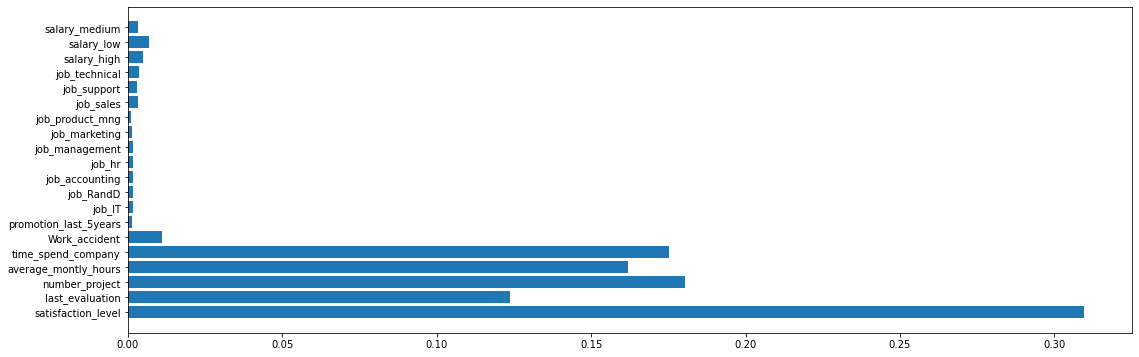

In [39]:
plt.figure(figsize=(18, 6))
plt.barh(X_test.columns, RF_im.feature_importances_)

Dari data diketahui **satisfaction_level** lah nilai yang sangat mempengaruhi untuk pengunduran diri karyawan dimana hasil ini sesuai dengan EDA pada bagian sebelumnya. Sehingga HR perlu  menjaga kepuasaan setiap karyawannya. Selain itu banyaknya projek yang diterima, dan jumlah jam kerja setiap bulannya juga mempengaruhi